# useful links

### - \[Time-Series Forecasting: Predicting Stock Prices Using An ARIMA Model\]
### https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70

### - \[Advanced Time Series Analysis with ARMA and ARIMA\]
### https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d

### https://campus.datacamp.com/courses/arima-models-in-python/chapter-3-the-best-of-the-best-models?ex=1

In [5]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# from statsmodels.tsa.stattools import pacf
# from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
df = pd.read_csv('NOC.csv',usecols=['Open','High','Low','Close','Date'])
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.set_index('Date',inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2010-01-04 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2769 non-null   float64
 1   High    2769 non-null   float64
 2   Low     2769 non-null   float64
 3   Close   2769 non-null   float64
dtypes: float64(4)
memory usage: 108.2 KB
None


,Open,High,Low,Close
Date,,,,
2010-01-04,50.686352,51.382046,50.686352,51.363976
2010-01-05,51.228451,51.906075,51.228451,51.454327
2010-01-06,51.318802,51.698269,51.129066,51.653095
2010-01-07,51.427219,52.366859,51.246521,52.186161
2010-01-08,51.833794,52.493351,51.635025,51.897041


## target variable will be the 'Close'

### Before building the ARIMA model, let’s see if there is some cross-correlation in out data.

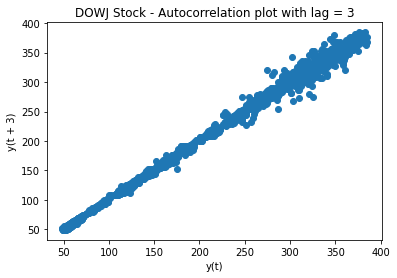

In [3]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('DOWJ Stock - Autocorrelation plot with lag = 3')
plt.show()

### We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).


### plot the stock price evolution over time

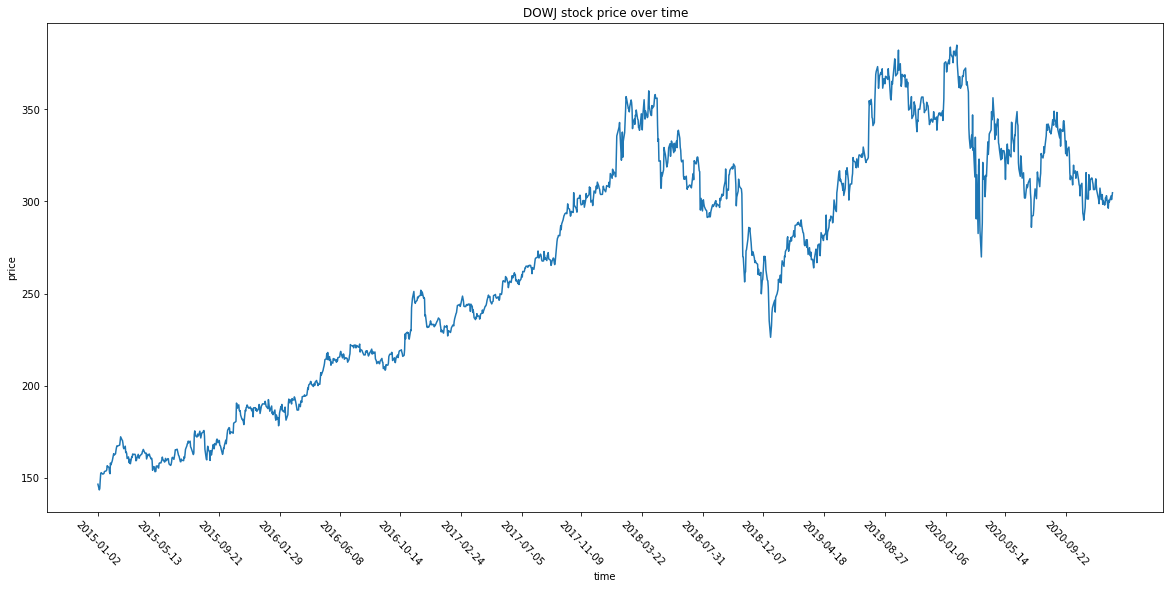

In [4]:
plt.figure(figsize=(20,9))
df = df['2015':'2020']
plt.plot(df.index, df["Close"])
plt.xticks(df[::90].index, df[::90].index.date,rotation = -46)
plt.title("DOWJ stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

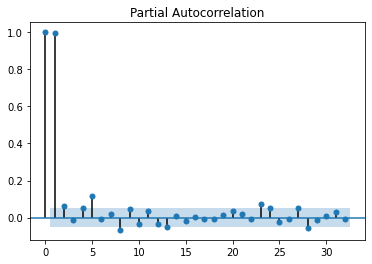

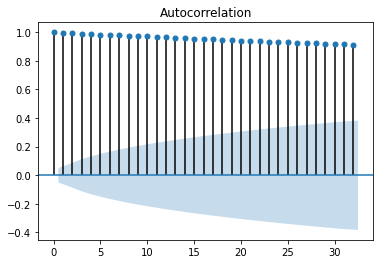

In [12]:
plot_pacf(df["Close"]);
plot_acf(df["Close"]);

## divide the data into a training (70 % ) and test (30%) set
### ARIMA parameters: p=4, d=1 and q=0.

In [71]:
p,d,q=4,1,0
train_data, test_data = train_test_split(df,random_state=42,test_size=0.3,shuffle=False) 
training_data = train_data['Close'].values
testing_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(testing_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = testing_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(testing_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 44.18636615122366


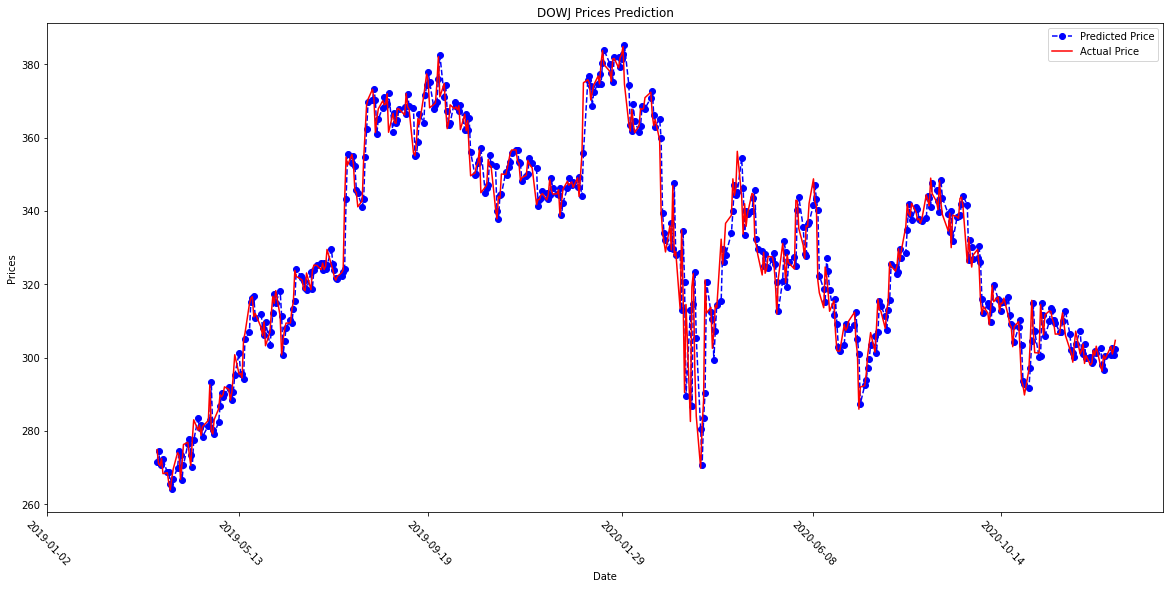

In [76]:
test_set_range = test_data.index
plt.figure(figsize=(20,9))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, testing_data, color='red', label='Actual Price')
plt.title('DOWJ Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(df['2019'::90].index, df['2019'::90].index.date,rotation = -46)
plt.legend()
plt.show()